In [1]:
%reload_ext autoreload
%autoreload 2


In [9]:
import torch
import matplotlib.pyplot as plt
from estimators.data import TraversabilityDataset, get_transform
from estimators.data.TraversabilityDataset import PatchesDataset
from estimators.utils import get_learner
from utilities.postprocessing.utils import KrockPatchExtractStrategy
from utilities.patches import *
from interpretability import *
from utilities.patches import *
from jupyterthemes import jtplot
from estimators.utils import load_model_from_name
import matplotlib
import os


In [4]:
from jupyterthemes import jtplot
jtplot.reset()

plt.style.use(['science', 'ieee'])
# matplotlib.rcParams['figure.figsize'] = (5,4)
get_ipython().config.get('IPKernelApp', {})['parent_appname'] = ""

# Parameters

In [5]:
model_name = 'microresnet#3-gate=7x7-n=1-se=True'
model_dir = '/media/francesco/Carino/vaevictis/data/1558825182.753924'
BASE_DIR = '/media/francesco/saetta/krock-dataset/test/'
TEST_META = BASE_DIR + '/meta.csv'

TEST_ROOT = '/media/francesco/saetta/krock-dataset/new-test-random/csvs_patches'
PATCHES_DIR = '/media/francesco/saetta/krock-dataset/new-test-random/patches/0.71/'

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
module = load_model_from_name(model_dir + '/roc_auc.pth', model_name )
module = module.eval().to(device)

MAX_ADVANCEMENT = 0.71
device

device(type='cuda')

# Analize Quarry Test Set
We are going to use the test set created from simulations run on the Quarry map to understand the model behaviour. We will try to answer different questions, such as "Which are the easiest traversable patches?" or "Are they any ground feature that can misslead the model?".

In [6]:
ds = TraversabilityDataset.from_root(TEST_ROOT, patches_dir=PATCHES_DIR, time_window = 50*2, patch_size=0.71, tr=0.2, transform=get_transform(debug=False))
learner, _ = get_learner(model_name, model_dir, [], dataset=ds)
explain = ExplainModel.from_leaner(learner, ds)

/home/francesco/Documents/Master-Thesis/core/interpretability/__init__.py:34: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  df = pd.concat([df, ds.df])


36128


In [7]:
explain.by_looking_at().tell(ClassificationAnswer.from_explain).plot_confusion_matrix()

SyntaxError: invalid syntax (<ipython-input-7-3c4f9d24ac59>, line 1)

## Visualize the best and worst patches sorted by advancement

In [24]:
'{:02d}'.format(2)

'02'

In [28]:
explanations = explain.by_looking_at([ Best(), Worst()],how_many=10, every=250)
base_dir = '/home/francesco/Documents/Master-Thesis/papers/Thesis/img/5/quarry/all/'

for name, explanation in explanations.items():
        explanation.df = explanation.df.sort_values('advancement')
        print(explanation.df['advancement'])
        answers = explanation.tell(PatchAnswer.from_explain) 
        save_dir = '{}/{}'.format(base_dir, name)
        os.makedirs(save_dir, exist_ok=True)
        for i, answer in enumerate(answers):
            answer.plot3d_mayavi(0.02, size=(513,513), distance=3.5, save_path='{}/{:02d}-patch-3d-majavi-colormap-{}.png'.format(save_dir, int(explanation.df['advancement'].iloc[i] * 100), i), azimuth=0, elevation=35, mesh=True, colormap='viridis', vmax=1)


0       0.351125
250     0.381787
776     0.443773
500     0.455441
1331    0.491537
1581    0.517617
2081    0.658459
1831    0.670353
2331    0.674230
1081    0.723328
Name: advancement, dtype: float64
8481    -0.083324
10414    0.001956
3471     0.014195
3721     0.015114
11046    0.021150
10796    0.035602
11969    0.060573
6070     0.062817
5783     0.101996
608      0.187742
Name: advancement, dtype: float64


## Most traversable patches
We expect the esiest traversable patches to be mostly flat. The following figure shows five patches sorted by the *traversable* class probability from the test set.

In [6]:
explanations = explain.by_looking_at([
                                      Shuffle(FalsePositive()),
                                      Shuffle(FalseNegative()),
                                      Shuffle(Worst()),
                                      Shuffle(Best()),
                                     ], how_many=5)

In [59]:
explanations['best'].tell(PatchAnswer.from_explain)[0].plot3d_mayavi(0.02, size=(513,513), distance=3.5, save_path='/home/francesco/Desktop/diocane.png', azimuth=0, elevation=35, mesh=True, colormap='viridis', vmax=1)

In [61]:
import os
plt.style.use(['science', 'ieee'])
module = module.eval()
class MyExplanationsSaver():
    def __init__(self, base_dir):
        self.base_dir = base_dir
            
    def __call__(self, explanations):
        for name, explanation in explanations.items():
            answers = explanation.tell(PatchAnswer.from_explain)
            save_dir = '{}/{}'.format(self.base_dir, name)
            os.makedirs(save_dir, exist_ok=True)
            print(answers)
            for i, answer in enumerate(answers):
#                 answer.plot2d().savefig('{}/patch-2d-{}'|.format(save_dir,i), bbox_inches='tight', transparent=True)
#                 answer.grad_cam(module.eval(), device, target_class=0).plot2d().savefig('{}/grad-cam-2d-{}'.format(save_dir,i), bbox_inches='tight', transparent=True)
#                 answer.heatmap((8,8)).plot2d().savefig('{}/heatmap-2d-{}'.format(save_dir,i), bbox_inches='tight', transparent=True)
#                 answer.plot3d(title='', rstride=1, cstride=1,)[0].savefig('{}/patch-3d-{}'.format(save_dir,i), bbox_inches='tight', transparent=True)
                answer.plot3d_mayavi(0.02, size=(513,513), distance=3.5, save_path='{}/patch-3d-majavi-colormap-{}.png'.format(save_dir,i), azimuth=0, elevation=35, mesh=True, colormap='viridis', vmax=1)
                plt.close("all")
                
MyExplanationsSaver('/home/francesco/Documents/Master-Thesis/papers/Thesis/img/5/quarry/')(explanations)

[Shape = (78, 78), Shape = (78, 78), Shape = (78, 78), Shape = (78, 78), Shape = (78, 78)]
[Shape = (78, 78), Shape = (78, 78), Shape = (78, 78), Shape = (78, 78), Shape = (78, 78)]
[Shape = (78, 78), Shape = (78, 78), Shape = (78, 78), Shape = (78, 78), Shape = (78, 78)]
[Shape = (78, 78), Shape = (78, 78), Shape = (78, 78), Shape = (78, 78), Shape = (78, 78)]


In [ ]:
def plot_answer(answer):
    answer.plot2d()
    answer.grad_cam(module, device).plot2d()
    answer.heatmap((8,8)).plot2d()
#     _ = answer.plot3d()[0]

Clearly, most of the patches are flat. The first patch is entirery flat, looking at the heights we can see that every value is zero. Interesting, the grad cam thinks highlights the middle of the patch. Grad cam creates a circle in the middle where the maximum activation point is exactly at the Krock's head position, 36 pixels from the left. Interesting, the highligthed region corespond to the Krock position while walking in flat ground. Correctly the full Krock footprint is highligthed while the corners are not taken into account since the robot won't ever reach them. So, our model is looking at the head position, at the robot footprint and at the future possible reachable region.

In [ ]:
answers = explanations['best'].tell(PatchAnswer.from_explain)

plot_answer(answers[0])

In [ ]:
for answers in explanations.values():
    for answer in answers:
        answers[idx].plot2d()
        answers[idx].grad_cam(module, device).plot2d()
        answers[idx].heatmap((8,8)).plot2d()
        _ = answers[idx].plot3d()[0]
# answers[idx].add_advancement_using_simulator(3, 100).plot2d()

In [ ]:
Patch.plot_all_2d(answers)

In [ ]:
import gc

gc.collect()

# Custom Patches


patch_shape = KrockPatchExtractStrategy.patch_shape(MAX_ADVANCEMENT)

res = 0.02
krock_body = 0.85 // res
surely_in_front_of_krock = int(krock_body + 10)
offset = patch_shape[1] - surely_in_front_of_krock

In [ ]:
def store_figures(figures, out_path):
    for i, fig in enumerate(figures):
        fig[0].savefig('{}{}.png'.format(out_path,i), bbox_inches='tight', transparent=True)

## Walls at different positions in front of Krock

In [45]:
walls = [WallPatch(KrockPatchExtractStrategy.patch_shape(0.66), strength=1, back=False, offset=int(offset))() for offset in np.linspace(1, 
                                                                                                                              patch_shape[0] // 2, 
                                                                                                                              10)]
walls_ds = PatchesDataset(patches=walls, transform=get_transform())


# store_figures(Patch.plot_all_3d(walls, rstride=1, cstride=1), '/home/francesco/Documents/Master-Thesis/papers/Thesis/img/5/walls_front/')

NameError: name 'patch_shape' is not defined

## Walls in front of krock of different height

In [46]:
MAX_ADVANCEMENT = 0.71
patch_shape = KrockPatchExtractStrategy.patch_shape(MAX_ADVANCEMENT)
patch_shape

res = 0.02
krock_body = 0.85 // res
surely_in_front_of_krock = int(krock_body + 10)
offset = patch_shape[1] - surely_in_front_of_krock

In [47]:

walls = [WallPatch(KrockPatchExtractStrategy.patch_shape(0.71), strength=s, back=False, offset=offset)() for s in np.linspace(0.01, 1, 100)]
walls_ds = PatchesDataset(patches=walls, transform=get_transform())

In [48]:
learner, _ = get_learner(model_name, model_dir, [], dataset=walls_ds)
learner.model = learner.model.eval()
explain = ExplainModel.from_leaner(learner, walls_ds)

100


In [49]:
%matplotlib notebook

In [50]:
explain.df['prediction']

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
     ..
70    0
71    0
72    0
73    0
74    0
75    0
76    0
77    0
78    0
79    0
80    0
81    0
82    0
83    0
84    0
85    0
86    0
87    0
88    0
89    0
90    0
91    0
92    0
93    0
94    0
95    0
96    0
97    0
98    0
99    0
Name: prediction, Length: 100, dtype: int64

<IPython.core.display.Javascript object>


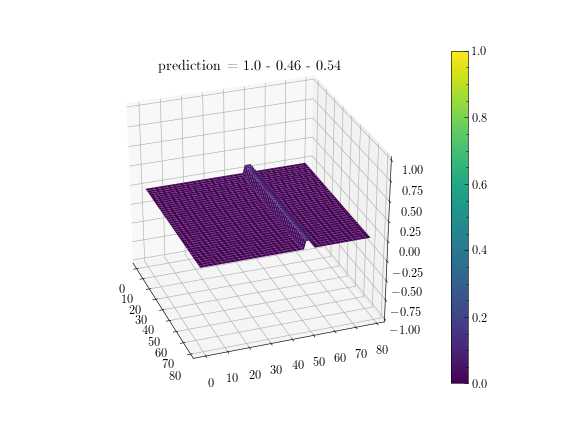

<IPython.core.display.Javascript object>


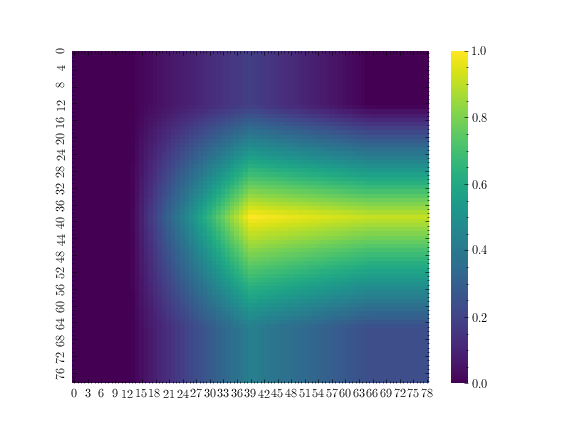

<IPython.core.display.Javascript object>


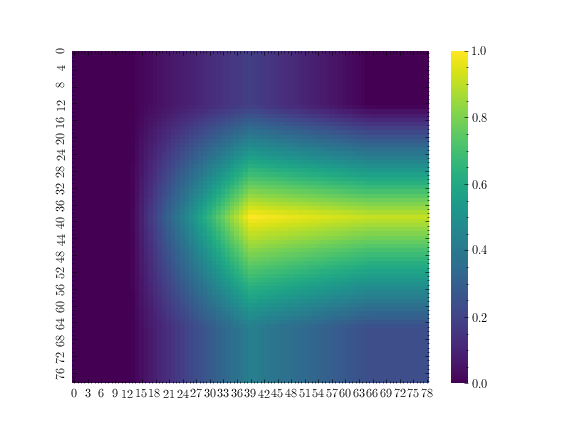

In [57]:
answer = explain.tell(answer=PatchAnswer.from_explain)

answer[9].plot3d()

# answer[8].grad_cam(module, device).plot2d()
# answer[9].add_advancement_using_simulator(2, 100)

# answer[9].df['advancement'].plot()
answer[10].grad_cam(module, device, target_class=0).plot2d()

## Bumps

## Ramps